# Ensemble methods : Random forest

In [182]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree


In [183]:
df = pd.read_csv("../data_cleaned/cleaned_dataset_no_zeros.csv")

df.head(10)

,Species,Country.of.Origin,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,...,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_mean_meters
0,Arabica,Ethiopia,Caturra,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,...,10.0,10.00,8.75,90.58,0.12,0,0.0,Green,0,2075.0
1,Arabica,Ethiopia,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,...,10.0,10.00,8.58,89.92,0.12,0,0.0,Green,1,2075.0
2,Arabica,Guatemala,Bourbon,Washed / Wet,8.42,8.50,8.42,8.42,8.33,8.42,...,10.0,10.00,9.25,89.75,0.11,0,0.0,Green,0,1700.0
3,Arabica,Ethiopia,Caturra,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,...,10.0,10.00,8.67,89.00,0.11,0,0.0,Green,2,2000.0
4,Arabica,Ethiopia,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,...,10.0,10.00,8.58,88.83,0.12,0,0.0,Green,2,2075.0
5,Arabica,Ethiopia,Caturra,Washed / Wet,8.25,8.33,8.50,8.42,8.33,8.50,...,10.0,9.33,9.00,88.67,0.03,0,0.0,Green,0,1635.0
6,Arabica,Ethiopia,Caturra,Washed / Wet,8.67,8.67,8.58,8.42,8.33,8.42,...,10.0,9.33,8.67,88.42,0.03,0,0.0,Green,0,1635.0
7,Arabica,Ethiopia,Other,Natural / Dry,8.08,8.58,8.50,8.50,7.67,8.42,...,10.0,10.00,8.50,88.25,0.10,0,0.0,Green,4,1822.5
8,Arabica,Ethiopia,Caturra,Natural / Dry,8.17,8.67,8.25,8.50,7.75,8.17,...,10.0,10.00,8.58,88.08,0.10,0,0.0,Green,1,1905.0
9,Arabica,United States,Other,Washed / Wet,8.25,8.42,8.17,8.33,8.08,8.17,...,10.0,10.00,8.50,87.92,0.11,0,0.0,Green,0,1872.0


#### Extra cleaning

In [184]:
# Extra cleaning in order to make a random forest regression model
# Species column should be be numeric
df['Species'].unique()
df['Species_type'] = df['Species'].map({'Arabica': 0, 'Robusta': 1})
# Processing_method colum should be numeric
df['Processing.Method'].unique()
df['Processing_method_type'] = df['Processing.Method'].map({'Washed / Wet': 0, 'Natural / Dry': 1, 'Pulped natural / honey': 3, 'Semi-washed / Semi-pulped': 4, 'Other': 5})
# Ekstra columns that are not numeric should be dropped
columns_to_drop = ['Species', 'Country.of.Origin', 'Processing.Method', 'Variety', 'Color']
df = df.drop(columns=columns_to_drop)

In [185]:
df.head(5)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters,Species_type,Processing_method_type
0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,0,2075.0,0,0
1,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,1,2075.0,0,0
2,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.11,0,0.0,0,1700.0,0,0
3,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,2,2000.0,0,1
4,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,2,2075.0,0,0


In [186]:
# df_cleaned_random_forrest is what we are gonna use for the random forrest regression model
df_cleaned_random_forrest = df

### Random forest regression

We have decided to use the random forest regression model to predict coffee quality based on selected features. 
The reason we chose the random forest model was that first of all we wanted to predict coffee quality and our data is not time depending, so are traditional linear model might not be as effective. Random forest is known for its high accuracy and robustness against overfitting, as it takes the predicitions of multiple decision trees to produce are more reliable output. 

Source: https://medium.com/@byanalytixlabs/random-forest-regression-how-it-helps-in-predictive-analytics-01c31897c1d4

In [187]:
# Setting target variable (y) to be the quality_score column and x is the rest of the columns as input variables
X = df_cleaned_random_forrest.drop(columns=["Total.Cup.Points"])
y = df_cleaned_random_forrest["Total.Cup.Points"]

In [188]:
# Using the train_test_split from sklearn to split into training and test sets
# 80 % is training data and 30 % is test data. 
# The training data is used to build the model and the test data is used to evaluate if the model performs well.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [189]:
# Creates a random with a 100 trees and max depth of 15.
model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
# Uses the training data to fit and build the model.
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=42)

In [190]:
# Predicitons for the target variable (y) Total.Cup.Points column.
# It uses the test data on the model to predict Total.Cup.Points score. 
y_pred = model.predict(X_test)

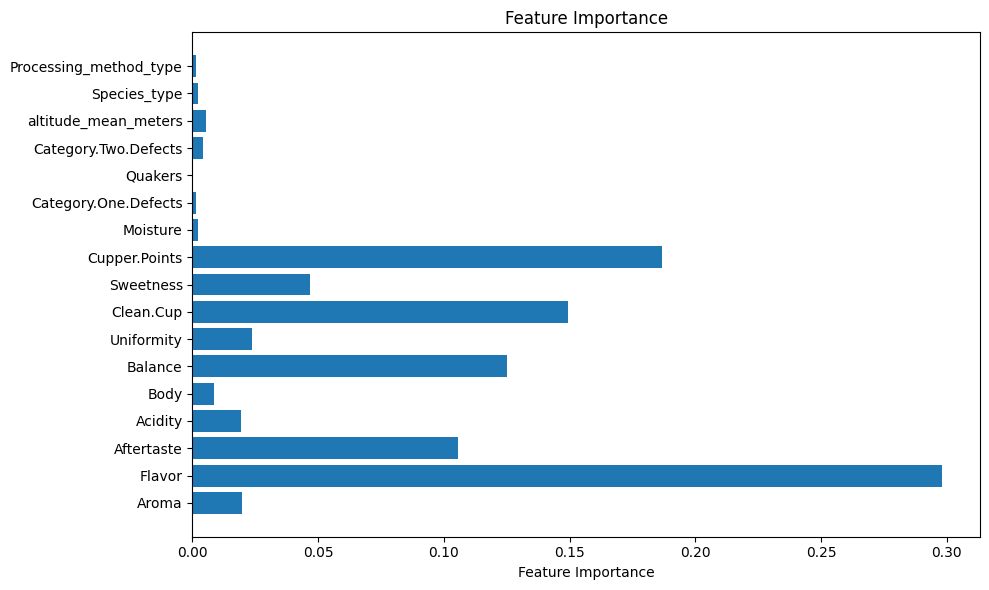

In [191]:
importances = model.feature_importances_
feature_names = X.columns

# Plot that shows which features are most important for prediciting the outcome of coffee_quality
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In the plot above we see a feature importance plot that shows us how important our features in the dataset is when it comes to reducing errors in measurements like R2 score and MSE. We see that features like Cupper.Points, Flavor, etc are very important features for our model and features like species_type, processing_method_type is less important. 

#### Performance metrics

We can use different performance metrics to evalute our model. For regression we typically use mean squared error (MSE) and R2 score.
The MSE calcautes the average squared difference between the predicted y (y_pred) and the actual value of y. So it essensially tells us how far away our predicted value of y is away from the real value of y, in average. The smaller the value in y is, the smaller the difference is. 

The r2 score calculates how much of the variance in the data that can be explained. A score close to 1 in this case is good and closer to 0 means that the variance cannot be explained.

source: https://medium.com/@wl8380/title-building-a-linear-regression-model-with-mse-and-r-squared-in-python-9df41472cf04



In [192]:
# Performance metrics on test set

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.19
R² Score: 0.97


Our mean squared error score is 0.19 and the R2 score is 0.97 which is exceptionally good. 

The performance metrics are so good that it would be a good idea to further investigate if we maybe have overfitted the model or there could be any other issues, just to evaluate that our model works well. 

We will also calcuate the MSE and R2 for the training set. It is not usually done, but we have to make sure they are performing simular and the model dont just perform well on the test data. 

In [193]:
# Performance metrics on train set

y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.11
R² Score: 0.98


The model is also performing very well on the training data with an MSE of 0.11 and R2 score of 0.98, which is quite similar to our test data. So it does indicate that the model works well on new data as well. 

#### Plots

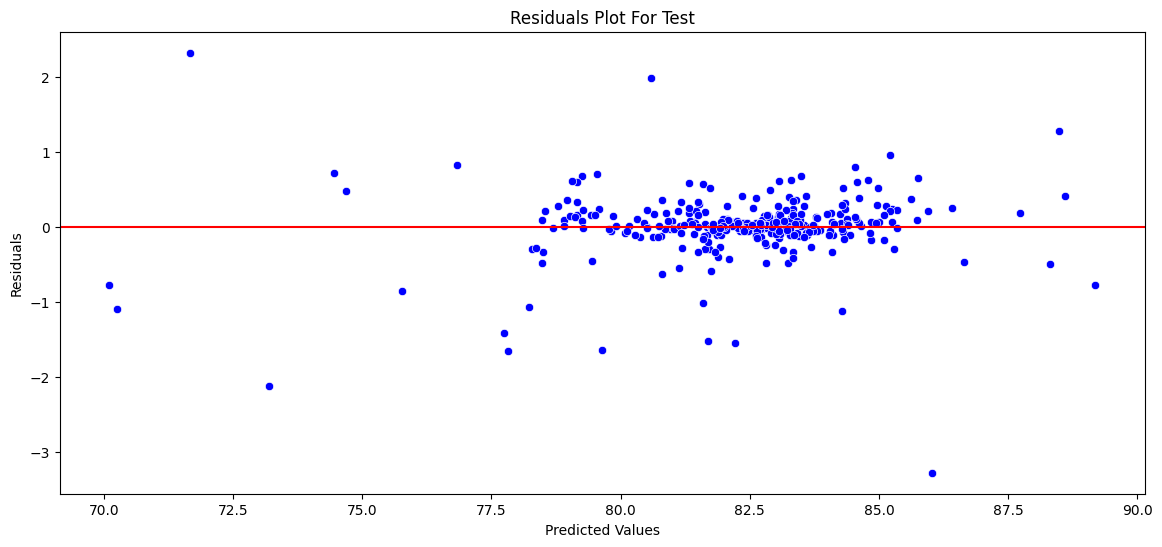

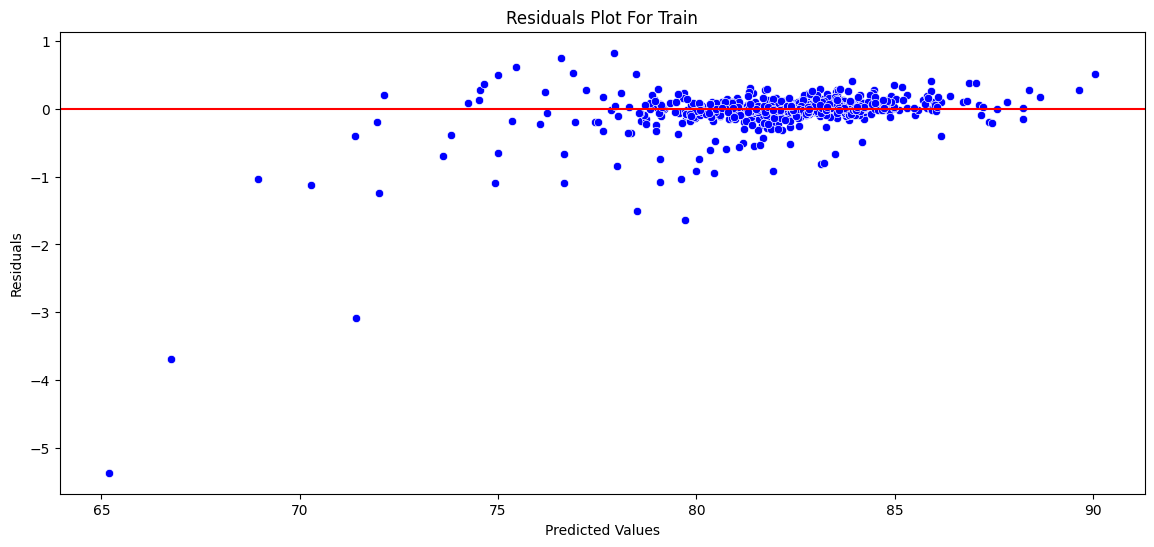

In [194]:
# Residual plots for test set and train set

residuals_test = y_test - y_pred

plt.figure(figsize=(14, 6))
sns.scatterplot(x=y_pred, y=residuals_test, color='blue')
plt.axhline(0, color='red')
plt.title('Residuals Plot For Test')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

residuals_train = y_train - y_train_pred
plt.figure(figsize=(14, 6))
sns.scatterplot(x = y_train_pred, y = residuals_train, color='blue')
plt.axhline(0, color='red')
plt.title('Residuals Plot For Train')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


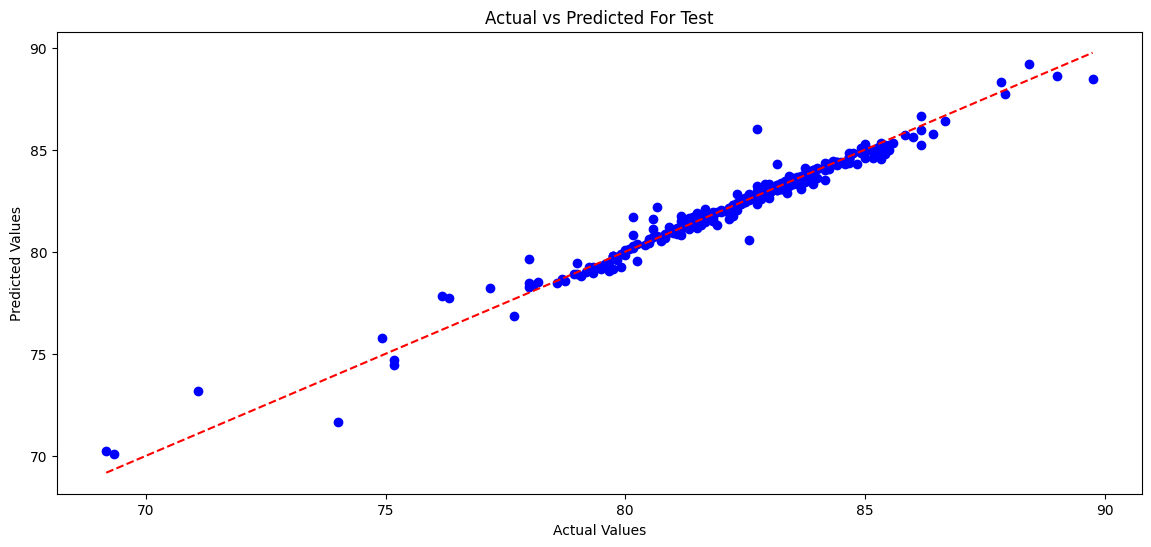

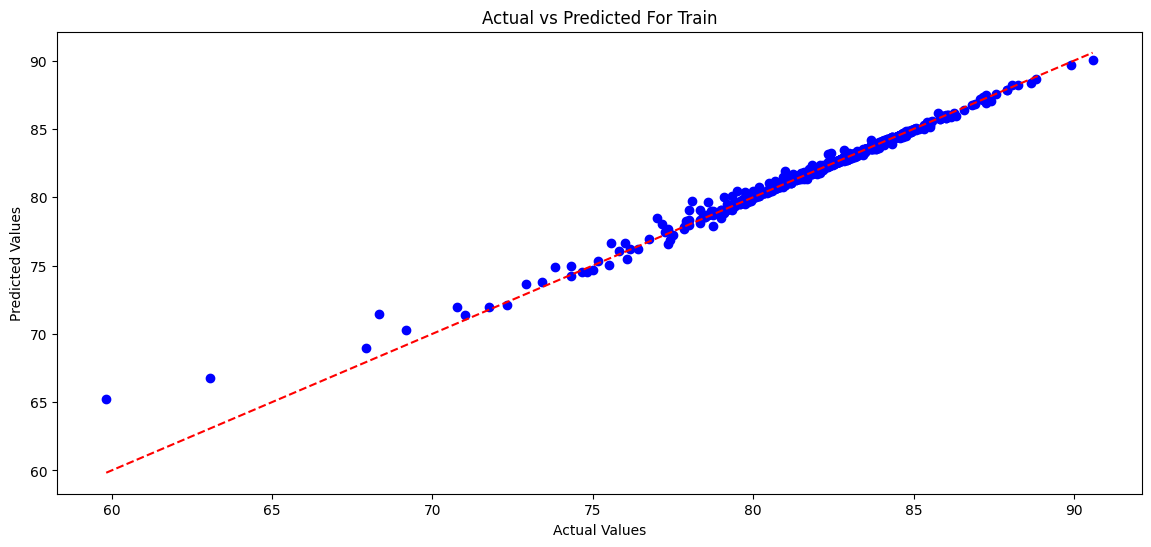

In [195]:
# Actual vs precicted plot for both test and train 

plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted For Test')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

plt.figure(figsize=(14, 6))
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title('Actual vs Predicted For Train')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

The predicited value is quite close in most cases, with the exception of a few outliers, to the actual value, which is good, because it tells us our model predicts well. 
It is however noticable that it seems, from the actual vs predicted plots above, that the model predicts higher values better than lower. We have more scattered points between actual values of 70 - 77. It does indicate that the model might not perform as well when it comes to coffee with less quality. 

#### Model evaluation

Our model seems to perform very well based on our metrics scores and the fact that the model also works very well on the training set data. With an R2 score of 0.97 and MSE of 0.11 it shows us that it is a very good model. 

The table below show how well the model performs when different metrics are changed. 

| Test Size | n_estimators | max_depth | R² Score | MSE    |
|-----------|--------------|-----------|----------|--------|
| 0.2       | 50          | 10       | 0.97     |  0.23  |
| 0.2       | 100          | 10        | 0.96     | 0.24  |
| 0.2       | 120          | 10        | 0.96     | 0.24  |
| 0.2       | 50          | 15         | 0.97     | 0.22  |
| 0.2       | 100          | 15        | 0.97     | 0.23  |
| 0.2       | 120          | 15        | 0.96     | 0.24  |
| 0.3       | 50          | 10        | 0.96     | 0.21  |
| 0.3       | 100          | 10        | 0.97     | 0.20  |
| 0.3       | 120          | 10        | 0.97     | 0.20  |
| 0.3       | 50          | 15        | 0.97     | 0.20  |
| 0.3       | 100          | 15        | 0.97     | 0.19 |
| 0.3       | 120          | 15        | 0.97     | 0.19  |


We do see overall that the R2 score is very good and close to 1. However we see that the MSE is a bit high maybe. MSE should be as close to 0 as possible and while our final model the MSE was 0.19 which is not low, but since the R2 score was so high, there could maybe be a potentiel issue, like some outliers we did not detect in the cleaning process. 0.19 is still closer to 0 as it should be but since the R2 score is 0.97 it is somewhat noticiable. 

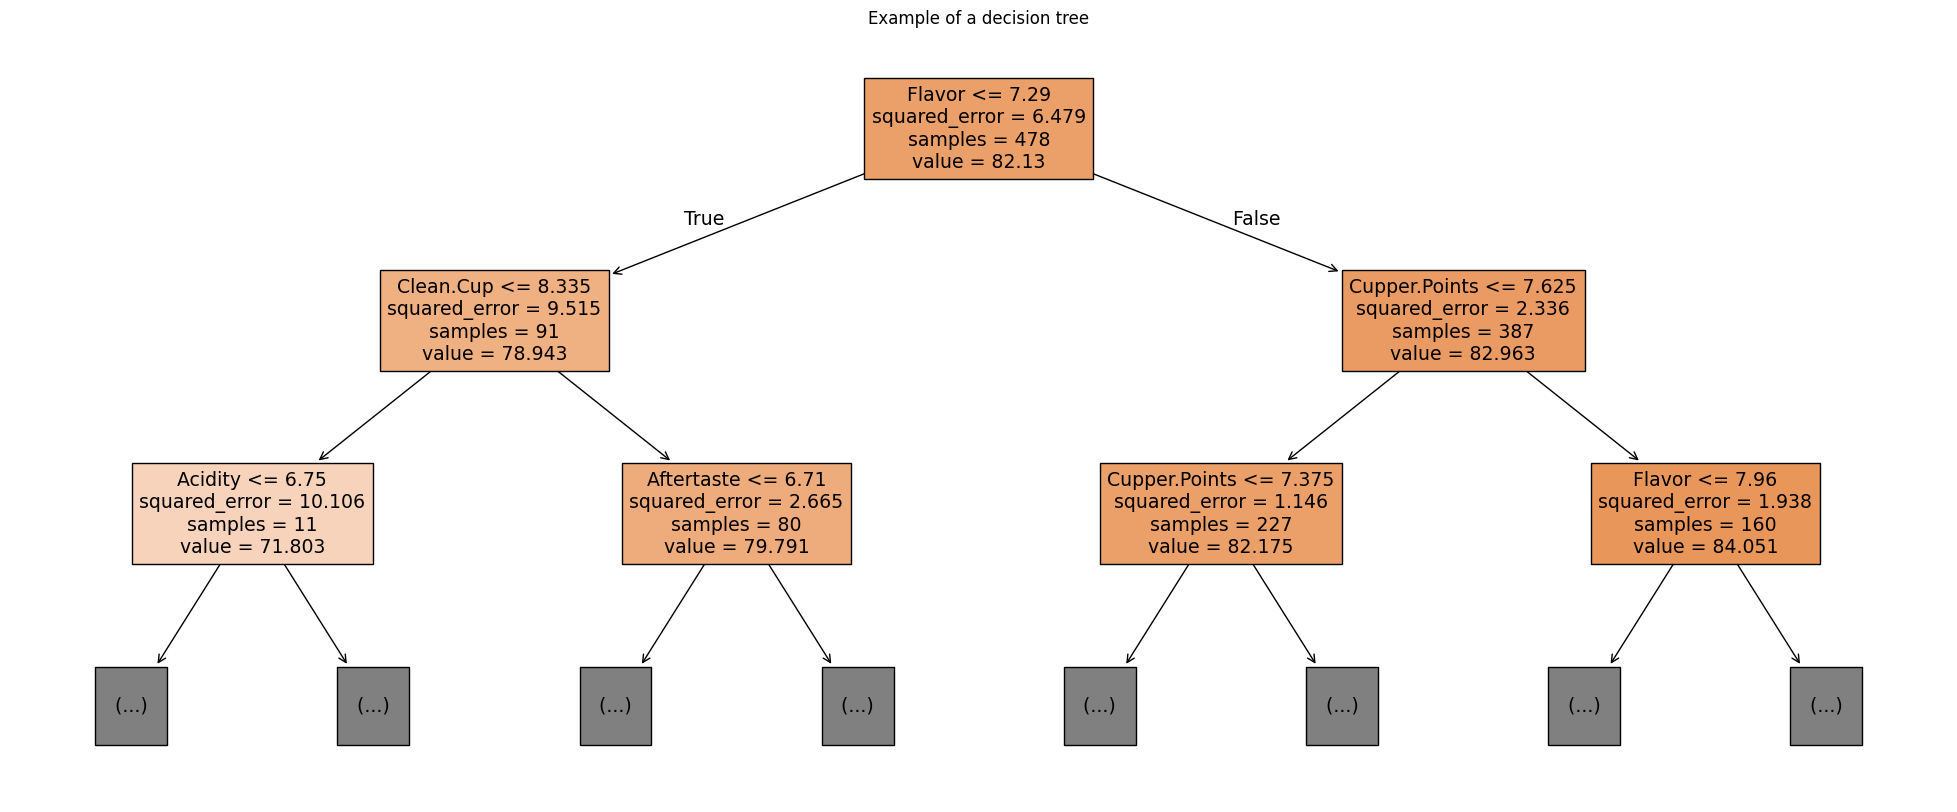

In [196]:
estimator = model.estimators_[6]  

plt.figure(figsize=(25, 10))
plot_tree(estimator,
          feature_names=X_train.columns,  
          filled=True,
          max_depth=2)  
plt.title("Example of a decision tree")
plt.show()

Above is just an example of how a decisions is made and how it looks with a depth of 2 for better visability. 